# 6.6 Sourcing and Analyzing Time-Series Data

### This script contains the following:
#### 1. Import libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

## 1. Importing libraries and data

In [71]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight')

In [72]:
quandl.ApiConfig.api_key = 'rtR6YPsJzEzzC9h743qm'

In [73]:
data = quandl.get('FRED/MEHOINUSA672N')

In [74]:
data.head()

,Value
Date,
1984-01-01,53337.0
1985-01-01,54334.0
1986-01-01,56291.0
1987-01-01,56964.0
1988-01-01,57433.0


In [75]:
data.shape

(37, 1)

In [76]:
data.columns

Index(['Value'], dtype='object')

In [77]:
#let's try a dataset with small values and large values
data2 = quandl.get('FRED/DSPIC96')

In [78]:
data2.shape

(756, 1)

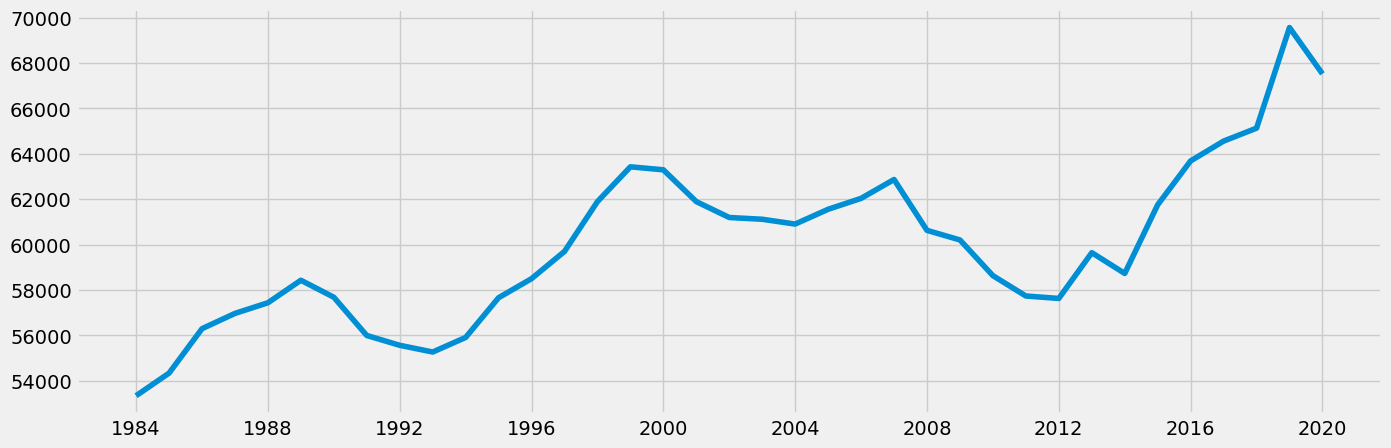

In [79]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)
#median household income

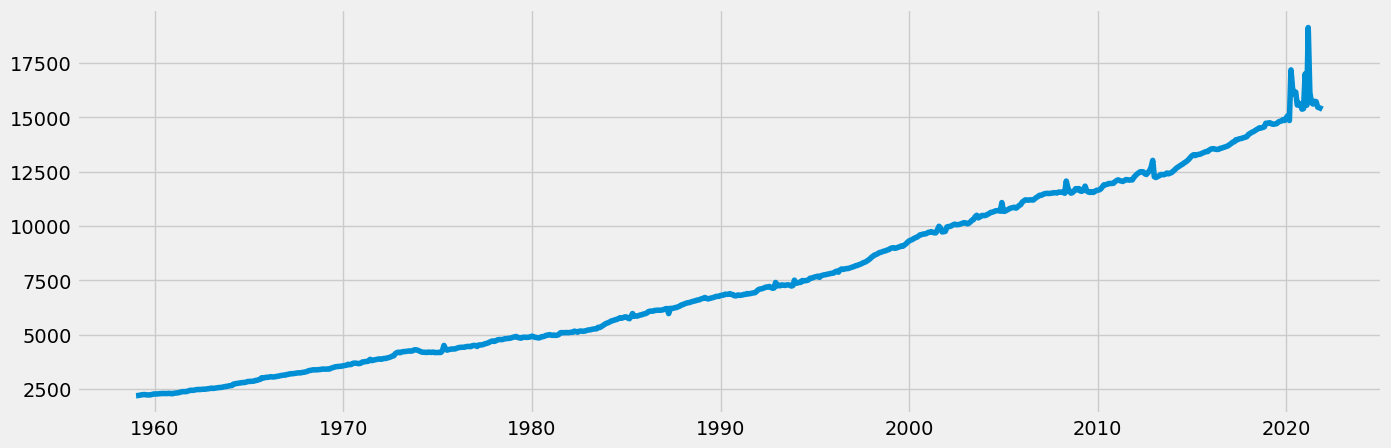

In [80]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data2)
#real disposable income

## 2. Subsetting, wrangling, and cleaning time-series data

In [81]:
#date column as filter
data_date = data.reset_index()

In [82]:
data_date.head()

,Date,Value
0,1984-01-01,53337.0
1,1985-01-01,54334.0
2,1986-01-01,56291.0
3,1987-01-01,56964.0
4,1988-01-01,57433.0


In [83]:
#This is a subset of the most recent median income
#because the data I'm using for my project consists of data mostly from the last 10 years
data_sub = data_date.loc[(data_date['Date'] >= '2000-01-01') & (data_date['Date'] < '2020-06-01')]

In [84]:
data_sub.head()

,Date,Value
16,2000-01-01,63292.0
17,2001-01-01,61889.0
18,2002-01-01,61190.0
19,2003-01-01,61113.0
20,2004-01-01,60901.0


In [85]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2000-01-01,63292.0
2001-01-01,61889.0
2002-01-01,61190.0
2003-01-01,61113.0
2004-01-01,60901.0


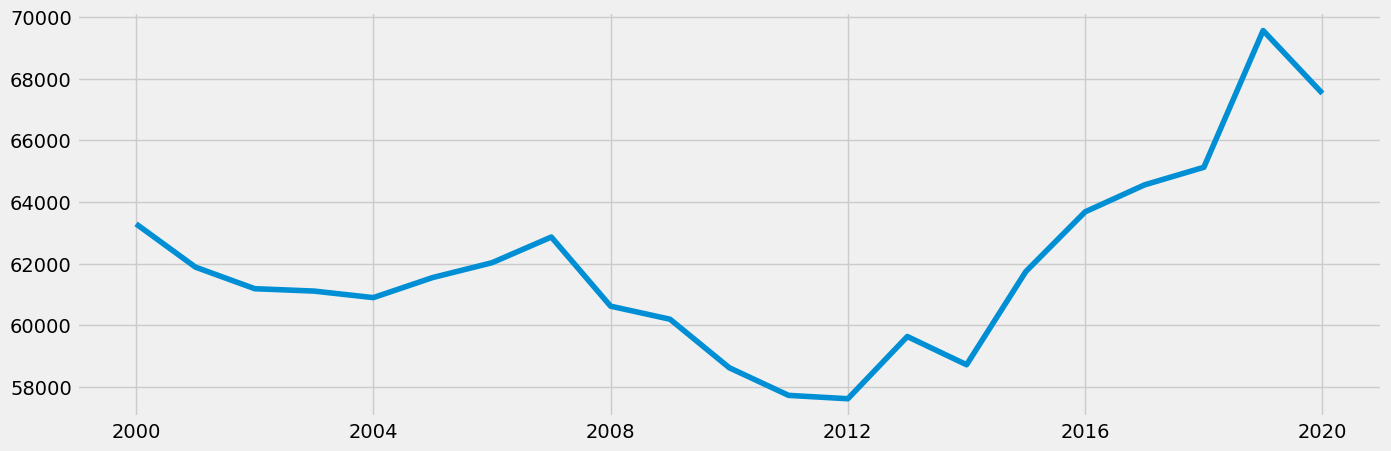

In [86]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)
#our data is non-linead, so we will use exponential/quadratic

In [87]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Value    0
dtype: int64

In [88]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

## Time series analysis: decomposition
This data is non-linear, so we will use exponential/quadratic

In [89]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='multiplicative')

In [90]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

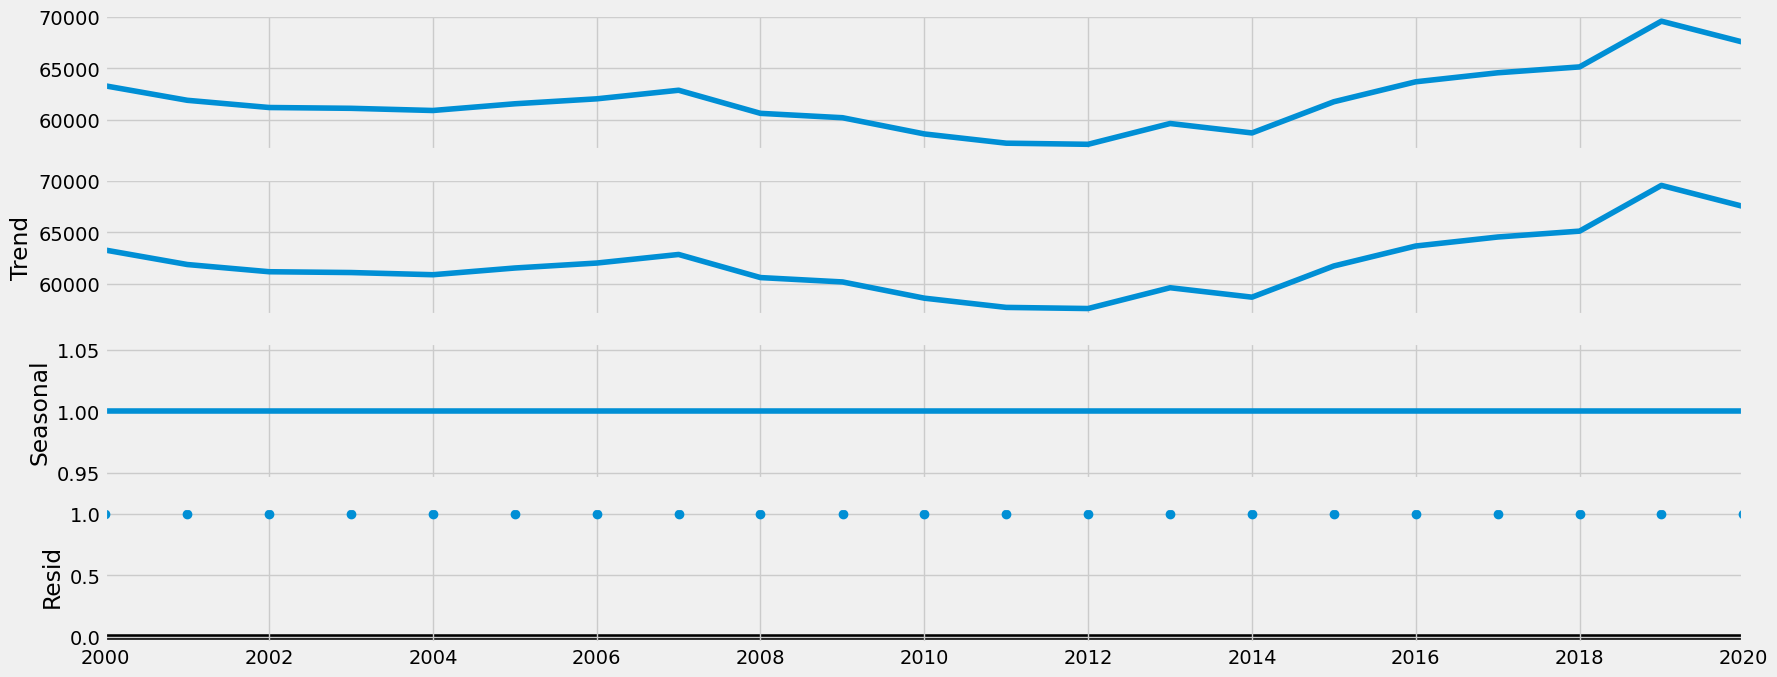

In [91]:
# Plot the separate components

decomposition.plot()
plt.show()

Oh wow! That's quite impressive how it breaks it down among the types. Let's try the other dataset.

This one does not have seasonality, but there are missing points throughout the seasons as the data is measured once a year.

In [92]:
data2_date = data2.reset_index()

In [93]:
# Set the "Date" column as the index

from datetime import datetime

data2_date['datetime'] = pd.to_datetime(data2_date['Date']) # Create a datetime column from "Date.""
data2_date = data2_date.set_index('datetime') # Set the datetime as the index of the dataframe.
data2_date.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data2_date.head()

,Value
datetime,
1959-01-01,2191.5
1959-02-01,2198.1
1959-03-01,2210.7
1959-04-01,2225.0
1959-05-01,2237.1


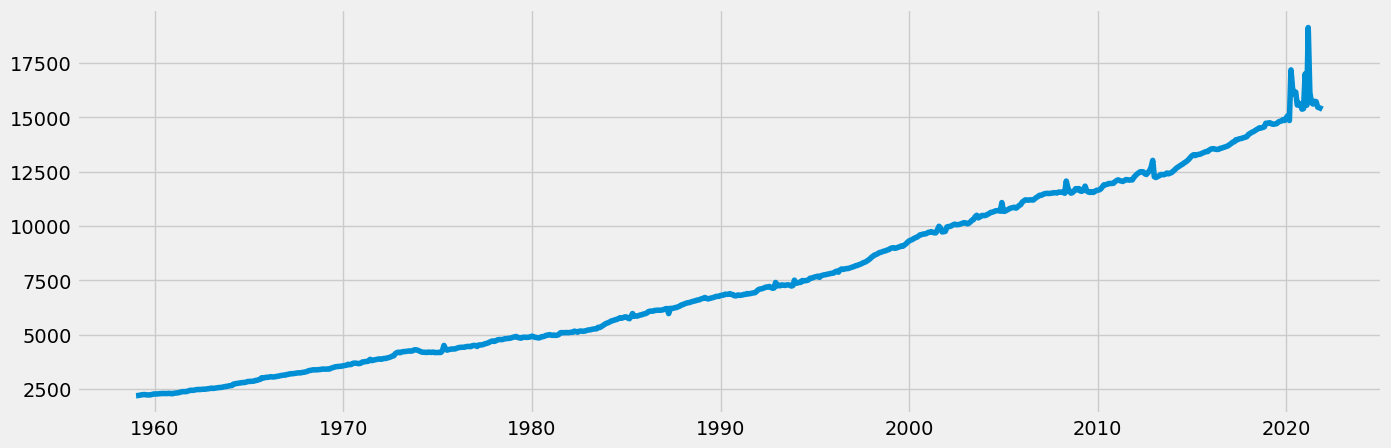

In [94]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data2_date)

This one is linear, so we will use additive.

In [95]:
decomposition2 = sm.tsa.seasonal_decompose(data2_date, model='additive')

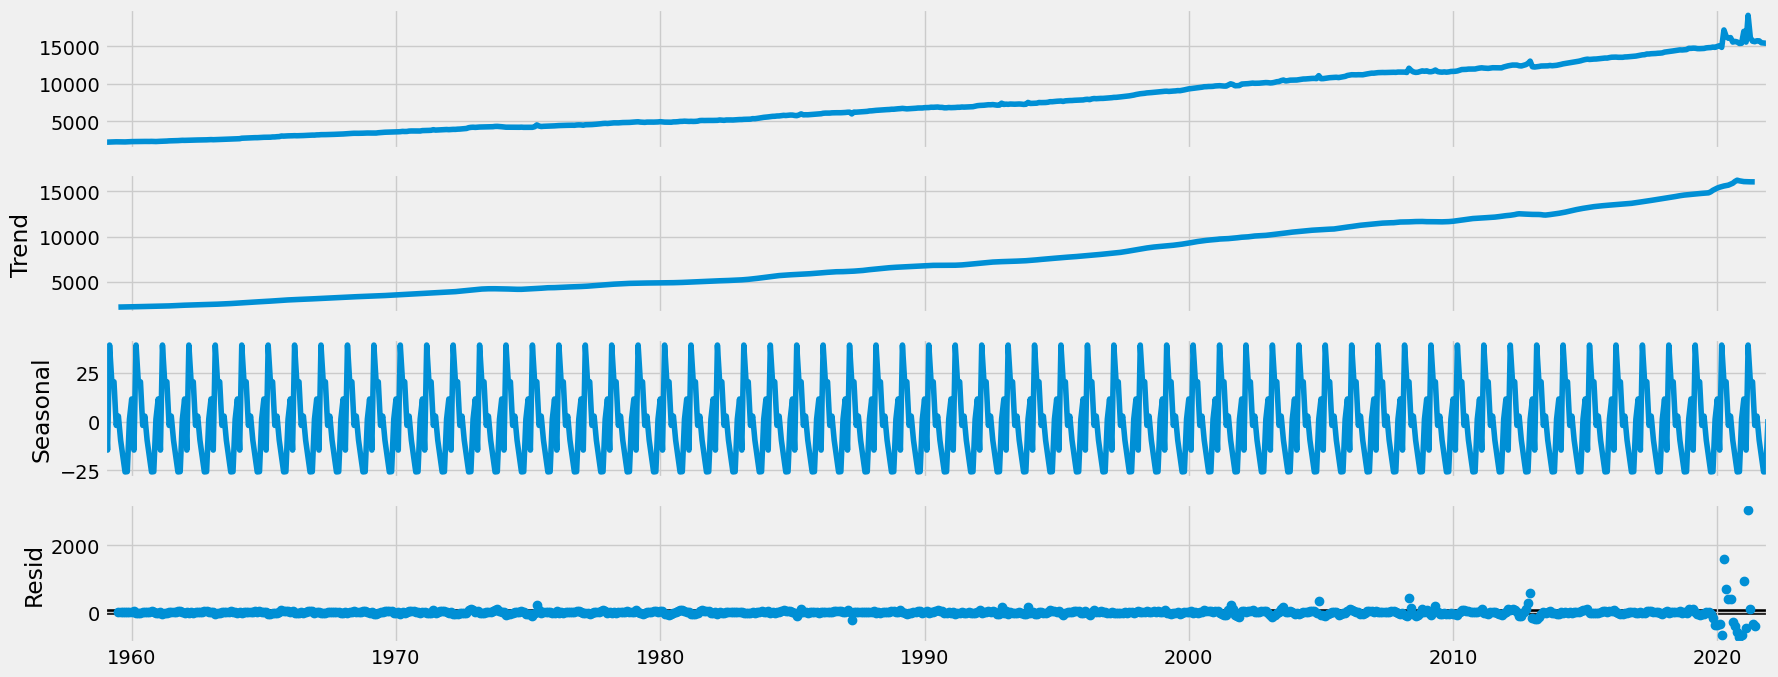

In [96]:
# Plot the separate components

decomposition2.plot()
plt.show()

## Stationarity
We can only forecast if our time series is stationary. We can cleary tell by the trend of the second that it is not stationary as it slopes upward. Let's use stats to make sure!

In [97]:
#check for the presence of a unit root with a Dickey-Fuller test

In [98]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.112617
p-value                         0.710014
Number of Lags Used             6.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


The test stat is greater than the critical values, so we cannot reject the null hypothesis

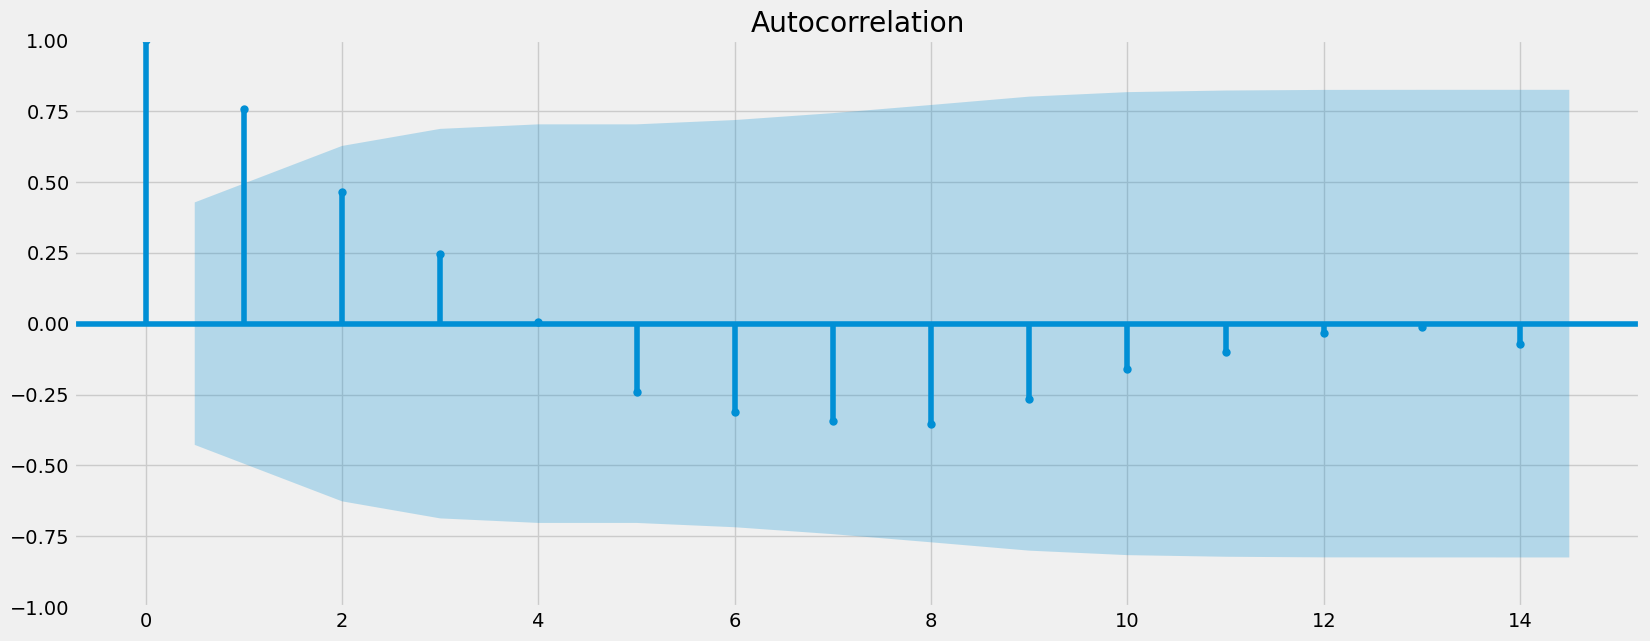

In [99]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

In [100]:
#for the second one

# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data2_date['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   3.286761
p-value                          1.000000
Number of Lags Used             20.000000
Number of Observations Used    735.000000
Critical Value (1%)             -3.439278
Critical Value (5%)             -2.865480
Critical Value (10%)            -2.568868
dtype: float64


Test stat is again greater than critical value, so it is non-stationary...

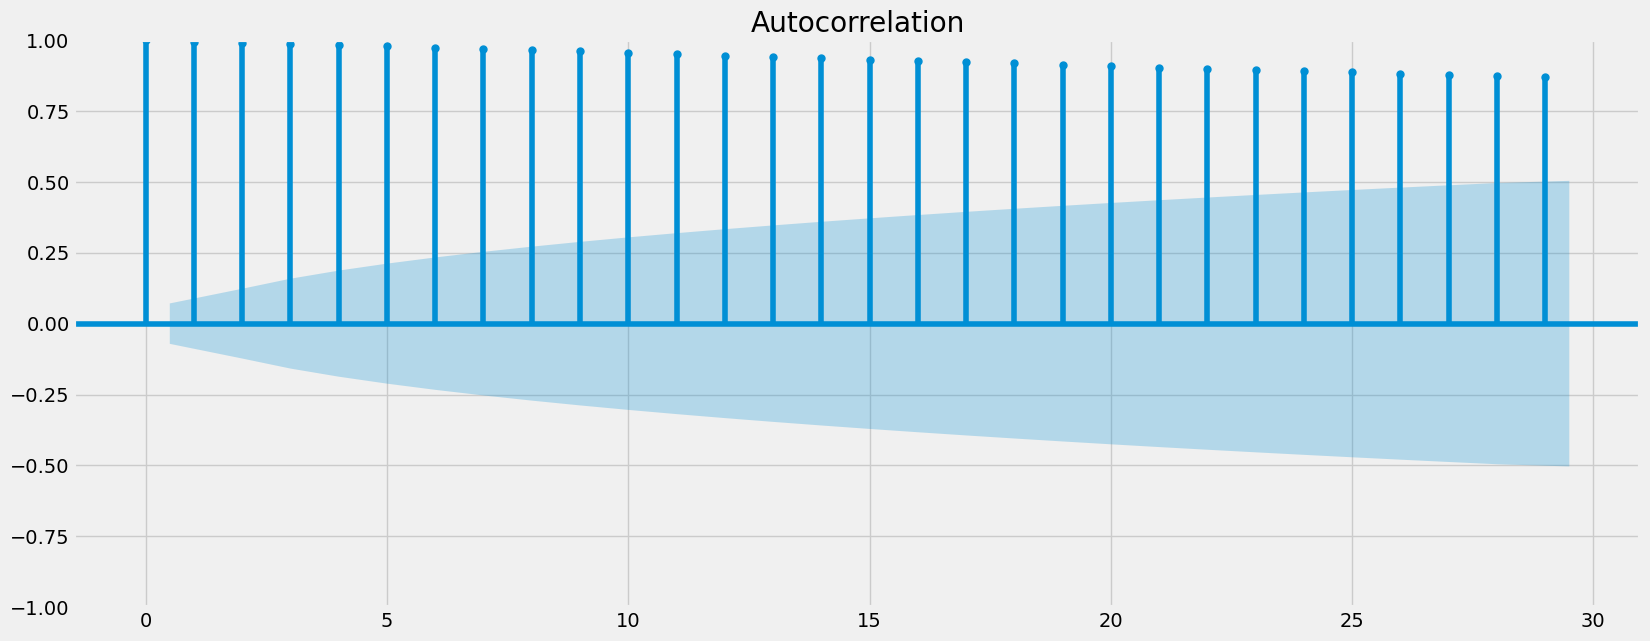

In [101]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data2_date)
plt.show()

Since neither is stationary, we need to make them so!

## Stationarizing data

In [112]:
data_diff = data_sub-data_sub.shift(1)

In [113]:
data_diff.dropna(inplace=True)

In [114]:
data_diff.head()

,Value
datetime,
2001-01-01,-1403.0
2002-01-01,-699.0
2003-01-01,-77.0
2004-01-01,-212.0
2005-01-01,652.0


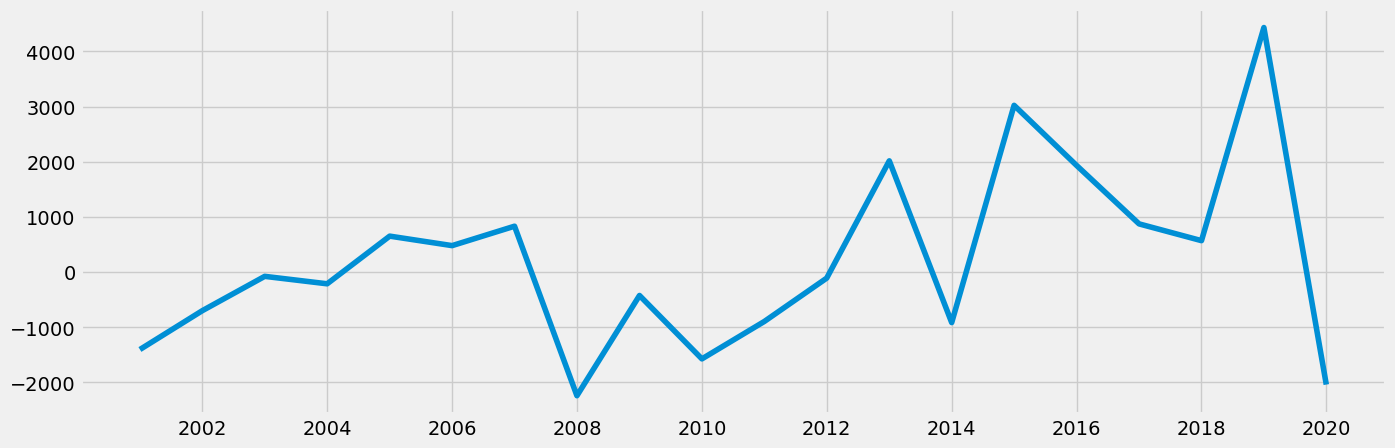

In [115]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [116]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.105749
p-value                         0.948863
Number of Lags Used             5.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


So this is still not less than. What do we do next? Another round of differencing I suppose.

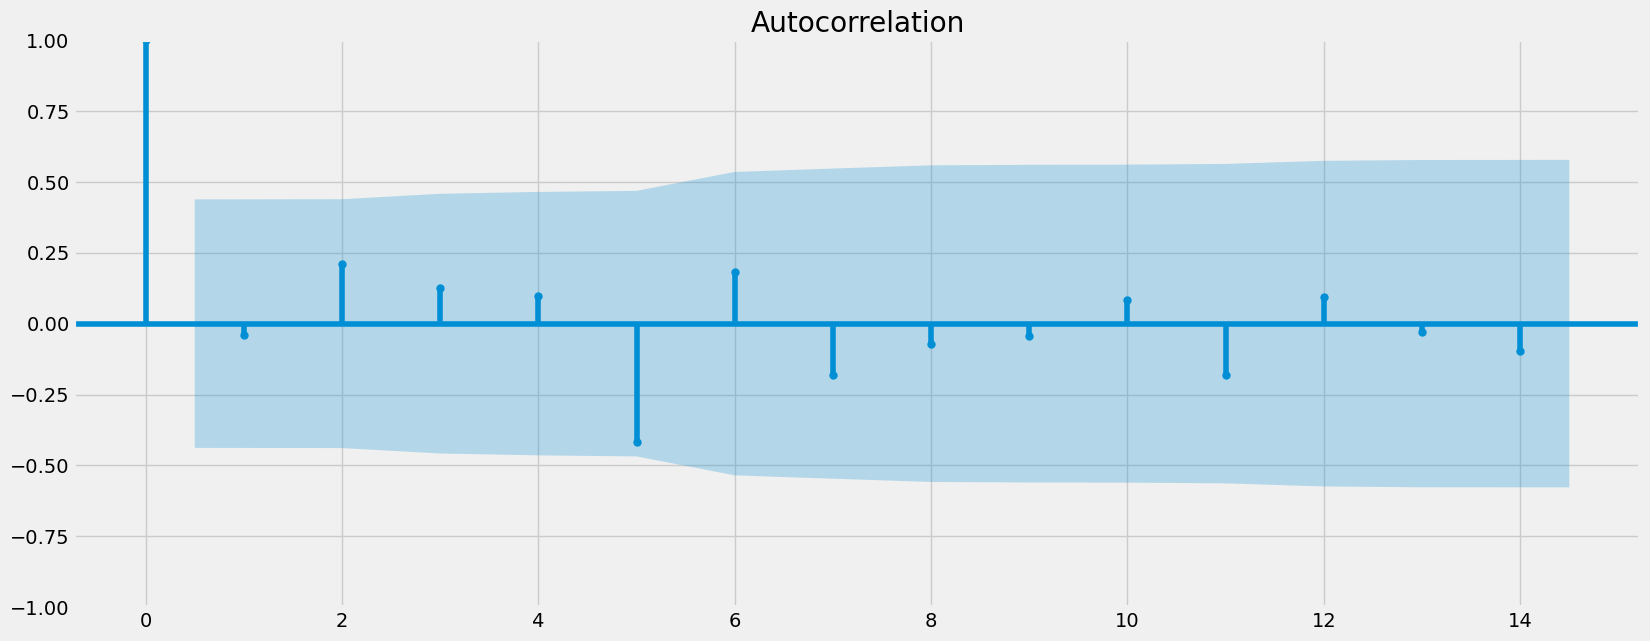

In [117]:
plot_acf(data_diff)
plt.show()

#### Next round of differencing

In [107]:
data_diff = data_sub - data_sub.shift(2)

In [108]:
data_diff.head()

,Value
datetime,
2000-01-01,NaN
2001-01-01,NaN
2002-01-01,-2102.0
2003-01-01,-776.0
2004-01-01,-289.0


In [109]:
data_diff.dropna(inplace = True)

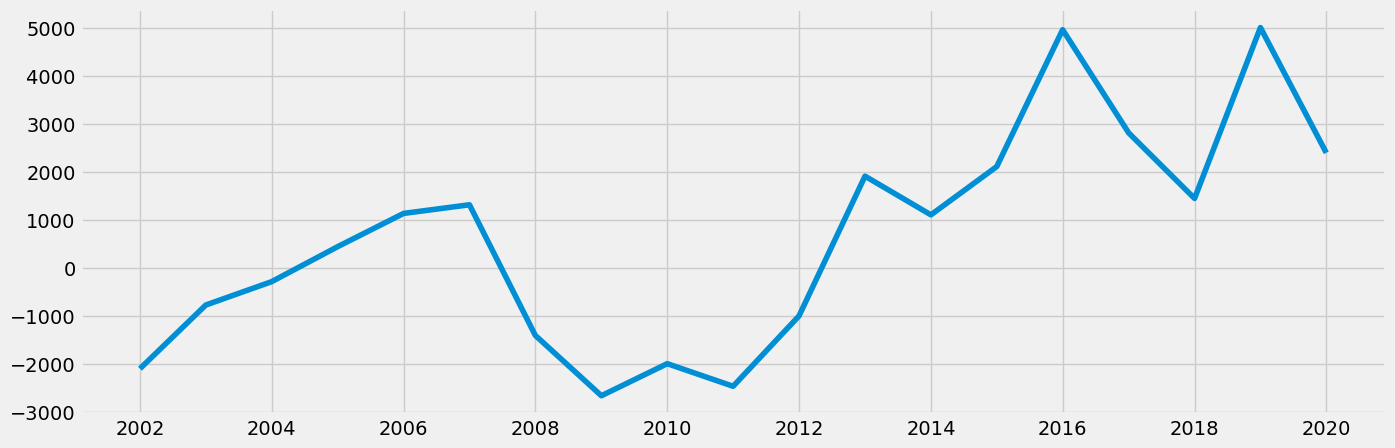

In [110]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [111]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  0.146571
p-value                         0.969101
Number of Lags Used             7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


Well that made it worse, so what do we do?!?!?!

### Other dataset!

In [57]:
data2_diff = data2_date - data2_date.shift(1)

In [58]:
data2_diff.dropna(inplace=True)

In [59]:
data2_diff.head()

,Value
datetime,
1959-02-01,6.6
1959-03-01,12.6
1959-04-01,14.3
1959-05-01,12.1
1959-06-01,7.5


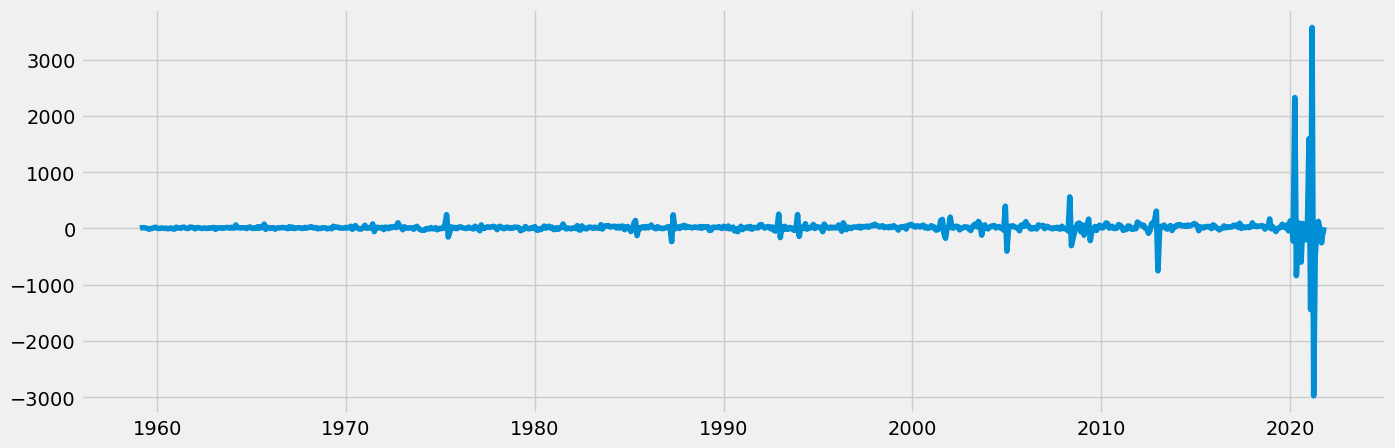

In [60]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data2_diff)

In [61]:
dickey_fuller(data2_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.690026e+00
p-value                        4.132061e-09
Number of Lags Used            1.900000e+01
Number of Observations Used    7.350000e+02
Critical Value (1%)           -3.439278e+00
Critical Value (5%)           -2.865480e+00
Critical Value (10%)          -2.568868e+00
dtype: float64


This worked great!!!!

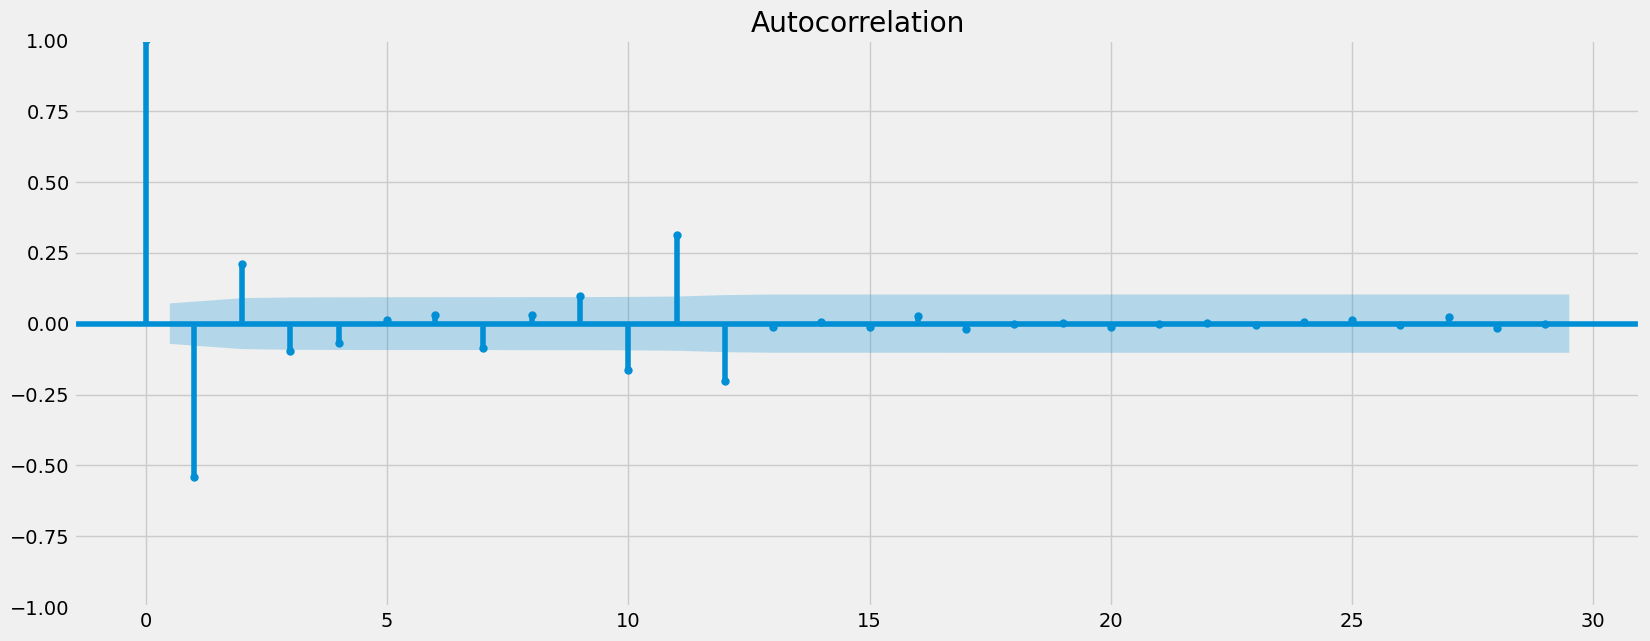

In [118]:
plot_acf(data2_diff)
plt.show()